<a href="https://colab.research.google.com/github/NiteeshSingh/DS-303-Course-Project/blob/main/SVR_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [ ]:
# Machine learning
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
  
# For data manipulation
import pandas as pd
import numpy as np
  
# To plot
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
  
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

# **Data Reading**

Getting our stock data

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/DS303 Project/RELIANCE.NS (3).csv')

Fixing our data since we are doing a time series prediction we want our data to be sequential.

In [ ]:
# fix the date 
df['Date'] = pd.to_datetime(df['Date'])

# setting index as date
df.reset_index(inplace=True)
df.set_index("Date", inplace=True)

In [ ]:
df.head()


,index,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2021-04-30,0,2008.500000,2036.000000,1987.550049,1994.500000,1988.104370,9150974
2021-05-03,1,1966.000000,1979.000000,1943.099976,1959.050049,1952.768188,10909942
2021-05-04,2,1950.000000,1967.800049,1911.000000,1916.599976,1910.454224,10083693
2021-05-05,3,1923.349976,1938.500000,1908.050049,1920.099976,1913.942993,5719649
2021-05-06,4,1921.849976,1935.000000,1906.599976,1931.000000,1924.807983,6749281


In [ ]:
df.tail()

,index,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2022-04-22,243,2758.899902,2802.000000,2744.199951,2758.800049,2758.800049,6947490
2022-04-25,244,2742.399902,2758.399902,2663.649902,2695.000000,2695.000000,7874671
2022-04-26,245,2710.000000,2795.000000,2707.699951,2775.649902,2775.649902,5643066
2022-04-27,246,2755.850098,2828.000000,2755.050049,2778.350098,2778.350098,8924920
2022-04-28,247,2809.949951,2851.000000,2786.100098,2819.850098,2819.850098,11820892


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 248 entries, 2021-04-30 to 2022-04-28
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      248 non-null    int64  
 1   Open       248 non-null    float64
 2   High       248 non-null    float64
 3   Low        248 non-null    float64
 4   Close      248 non-null    float64
 5   Adj Close  248 non-null    float64
 6   Volume     248 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 15.5 KB


# **Data Visualization**

Plotting our data and rolling mean

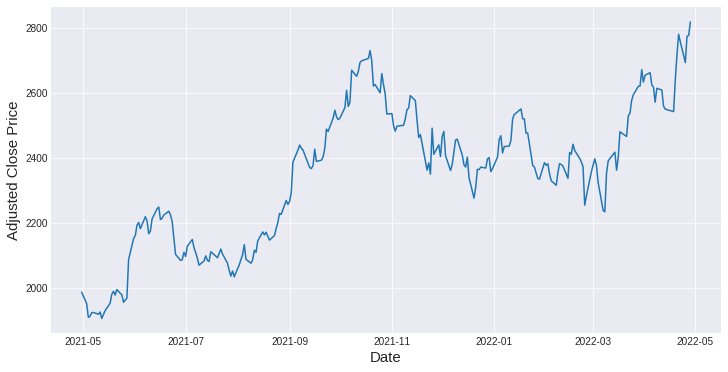

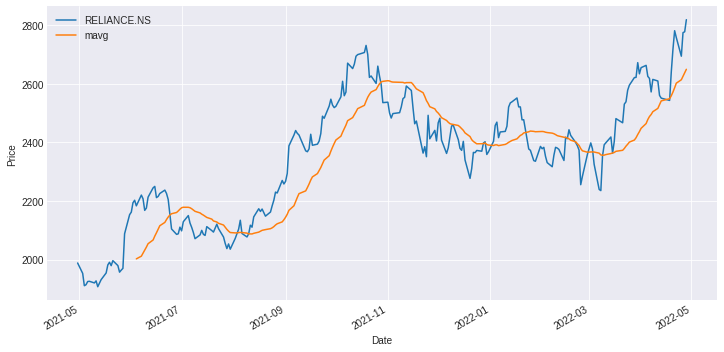

In [ ]:
# Visualize the training stock data:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (12,6))
plt.plot(df["Adj Close"])
plt.xlabel('Date',fontsize=15)
plt.ylabel('Adjusted Close Price',fontsize=15)
plt.show()


# Rolling mean
close_px = df['Adj Close']
mavg = close_px.rolling(window=25).mean()

plt.figure(figsize = (12,6))
close_px.plot(label='RELIANCE.NS')
mavg.plot(label='mavg')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

We get our adjusted closing prices from our dataframe and we plot a rolling mean on our data to see the long term trend of the data.

**Converting dates**

In [ ]:
import matplotlib.dates as mdates

# change the dates into ints for training 
dates_df = df.copy()
dates_df = dates_df.reset_index()

# Store the original dates for plotting the predicitons
org_dates = dates_df['Date']

# convert to ints
dates_df['Date'] = dates_df['Date'].map(mdates.date2num)

dates_df.tail()

,Date,index,Open,High,Low,Close,Adj Close,Volume
243,738267.0,243,2758.899902,2802.000000,2744.199951,2758.800049,2758.800049,6947490
244,738270.0,244,2742.399902,2758.399902,2663.649902,2695.000000,2695.000000,7874671
245,738271.0,245,2710.000000,2795.000000,2707.699951,2775.649902,2775.649902,5643066
246,738272.0,246,2755.850098,2828.000000,2755.050049,2778.350098,2778.350098,8924920
247,738273.0,247,2809.949951,2851.000000,2786.100098,2819.850098,2819.850098,11820892


# Using sklearn Support Vector Regression

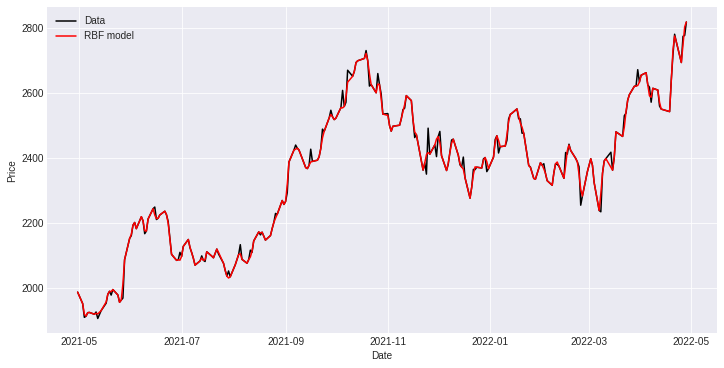

In [ ]:
# Use sklearn support vector regression to predicit our data:
from sklearn.svm import SVR

dates = np.stack(dates_df['Date'].values)
prices = np.stack(df['Adj Close'].values)

#Convert to 1d Vector
dates = np.reshape(dates, (len(dates), 1))
prices = np.reshape(prices, (len(prices), 1))

svr_rbf = SVR(kernel= 'rbf', C= 1e3, gamma= 0.1)
svr_rbf.fit(dates, prices)

plt.figure(figsize = (12,6))
plt.plot(dates, prices, color= 'black', label= 'Data')
plt.plot(org_dates, svr_rbf.predict(dates), color= 'red', label= 'RBF model') 
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

As we can see the predicted prices fits our data very well, but it is most likely overfit. This model would have a hard time generalizing on a month of unseen RELIANCE stock data. 

#  Using sklearn Support Vector Classifier

In [ ]:
# Creating predictor variables
df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low
  
# Store all predictor variables in a variable X
X = df[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
Date,,
2021-04-30,14.000000,48.449951
2021-05-03,6.949951,35.900024
2021-05-04,33.400024,56.800049
2021-05-05,3.250000,30.449951
2021-05-06,-9.150024,28.400024


In [ ]:
# Target variables
y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
y

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0])

The profit or loss calculation is usually determined by the closing price of a stock for the day, hence we will consider the closing price as the target variable.

In [ ]:
# train test splitting
split_percentage = 0.2
split = int(split_percentage*len(df))
  
# Train data set
X_train = X[split:]
y_train = y[split:]
  
# Test data set
X_test = X[:split]
y_test = y[:split]

In [ ]:
# Support vector classifier
cls = SVC().fit(X_train, y_train)

In [ ]:
df['Predicted_Signal'] = cls.predict(X)

In [ ]:
accuracy_score(y_train, cls.predict(X_train))*100

57.286432160804026

In [ ]:
accuracy_score(y_test, cls.predict(X_test))*100

53.06122448979592

An accuracy of 50%+ in test data suggests that the classifier model is effective.

**Calculating Daily returns**

In [ ]:
# Calculate daily returns
df['Return'] = df.Close.pct_change()


**Calculating Strategy Returns**

In [ ]:
# Calculate strategy returns
df['Strategy_Return'] = df.Return *df.Predicted_Signal.shift(1)


**Calculate Cumulative Returns**

In [ ]:
# Calculate Cumulutive returns
df['Cum_Ret'] = df['Return'].cumsum()
df


,index,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret
Date,,,,,,,,,,,,,
2021-04-30,0,2008.500000,2036.000000,1987.550049,1994.500000,1988.104370,9150974,14.000000,48.449951,1,NaN,NaN,NaN
2021-05-03,1,1966.000000,1979.000000,1943.099976,1959.050049,1952.768188,10909942,6.949951,35.900024,1,-0.017774,-0.017774,-0.017774
2021-05-04,2,1950.000000,1967.800049,1911.000000,1916.599976,1910.454224,10083693,33.400024,56.800049,1,-0.021669,-0.021669,-0.039443
2021-05-05,3,1923.349976,1938.500000,1908.050049,1920.099976,1913.942993,5719649,3.250000,30.449951,1,0.001826,0.001826,-0.037616
2021-05-06,4,1921.849976,1935.000000,1906.599976,1931.000000,1924.807983,6749281,-9.150024,28.400024,1,0.005677,0.005677,-0.031940
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-22,243,2758.899902,2802.000000,2744.199951,2758.800049,2758.800049,6947490,0.099853,57.800049,1,-0.008375,-0.000000,0.355739
2022-04-25,244,2742.399902,2758.399902,2663.649902,2695.000000,2695.000000,7874671,47.399902,94.750000,1,-0.023126,-0.023126,0.332613
2022-04-26,245,2710.000000,2795.000000,2707.699951,2775.649902,2775.649902,5643066,-65.649902,87.300049,0,0.029926,0.029926,0.362539


**Calculating Strategy Cumulative Returns**

In [ ]:
# Plot Strategy Cumulative returns 
df['Cum_Strategy'] = df['Strategy_Return'].cumsum()
df

,index,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret,Cum_Strategy
Date,,,,,,,,,,,,,,
2021-04-30,0,2008.500000,2036.000000,1987.550049,1994.500000,1988.104370,9150974,14.000000,48.449951,1,NaN,NaN,NaN,NaN
2021-05-03,1,1966.000000,1979.000000,1943.099976,1959.050049,1952.768188,10909942,6.949951,35.900024,1,-0.017774,-0.017774,-0.017774,-0.017774
2021-05-04,2,1950.000000,1967.800049,1911.000000,1916.599976,1910.454224,10083693,33.400024,56.800049,1,-0.021669,-0.021669,-0.039443,-0.039443
2021-05-05,3,1923.349976,1938.500000,1908.050049,1920.099976,1913.942993,5719649,3.250000,30.449951,1,0.001826,0.001826,-0.037616,-0.037616
2021-05-06,4,1921.849976,1935.000000,1906.599976,1931.000000,1924.807983,6749281,-9.150024,28.400024,1,0.005677,0.005677,-0.031940,-0.031940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-22,243,2758.899902,2802.000000,2744.199951,2758.800049,2758.800049,6947490,0.099853,57.800049,1,-0.008375,-0.000000,0.355739,0.373973
2022-04-25,244,2742.399902,2758.399902,2663.649902,2695.000000,2695.000000,7874671,47.399902,94.750000,1,-0.023126,-0.023126,0.332613,0.350847
2022-04-26,245,2710.000000,2795.000000,2707.699951,2775.649902,2775.649902,5643066,-65.649902,87.300049,0,0.029926,0.029926,0.362539,0.380773


## **Plotting Strategy Returns vs Original Returns**

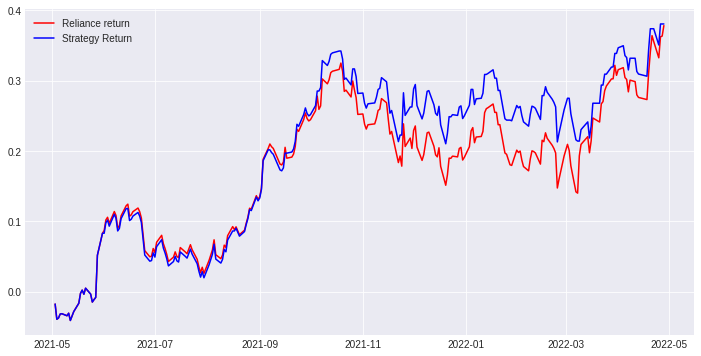

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df['Cum_Ret'],color='red', label='Reliance return')
plt.plot(df['Cum_Strategy'],color='blue', label='Strategy Return')
plt.legend()
plt.show()

Here, we see that our strategy seems to be outperforming the performance of the Reliance stock. 